# Notebook for EDA

This notebook contains the exploratory data analysis for the project. The data is from [2023 POSTECH OIBC Competition API](https://research-api.solarkim.com/docs#tag/Competition-2023). We cannot share the data due to the competition rules.

> Note: Please understand that a few annotations in this notebook are written in Korean.

> Note: We suppose that this code is executing on the Google Colab platform. The following code is used to import the libraries we need.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기

In [ ]:
df_elc = pd.read_csv("/content/drive/MyDrive/태양광 예측 공모전/OIBC2023_data/OIBC2023_data/gens.csv")
df_met = pd.read_csv("/content/drive/MyDrive/태양광 예측 공모전/OIBC2023_data/OIBC2023_data/weather_actual.csv")
df_pred = pd.read_csv("/content/drive/MyDrive/태양광 예측 공모전/OIBC2023_data/OIBC2023_data/pred.csv")

In [ ]:
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          11616 non-null  object 
 1   cloud         11616 non-null  float64
 2   temp          11616 non-null  float64
 3   humidity      11616 non-null  float64
 4   ground_press  11616 non-null  float64
 5   wind_speed    11616 non-null  float64
 6   wind_dir      11616 non-null  float64
 7   rain          11616 non-null  float64
 8   snow          11616 non-null  float64
 9   dew_point     11616 non-null  float64
 10  vis           11616 non-null  float64
 11  uv_idx        11616 non-null  float64
 12  azimuth       11616 non-null  float64
 13  elevation     11616 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.2+ MB


In [ ]:
# 각 라운드(1과 2) 및 각 모델(0, 1, 2, 3, 4)의 개수를 세기
round_model_counts = df_pred.groupby(['round', 'model_id']).size().unstack(fill_value=0)

# 결과 출력
print(round_model_counts)

model_id      0      1      2      3      4
round                                      
1         11616  11616  11616  11616  11616
2         11592  11592  11592  11592  11592


# df_met 시각화

In [ ]:
df_met_view = df_met.copy()
df_met_view['time'] = df_met_view['time'].str[:-6]
df_met_view['time'] = pd.to_datetime(df_met_view['time'], format='%Y-%m-%d %H:%M:%S')
df_met_view.set_index('time', inplace=True)

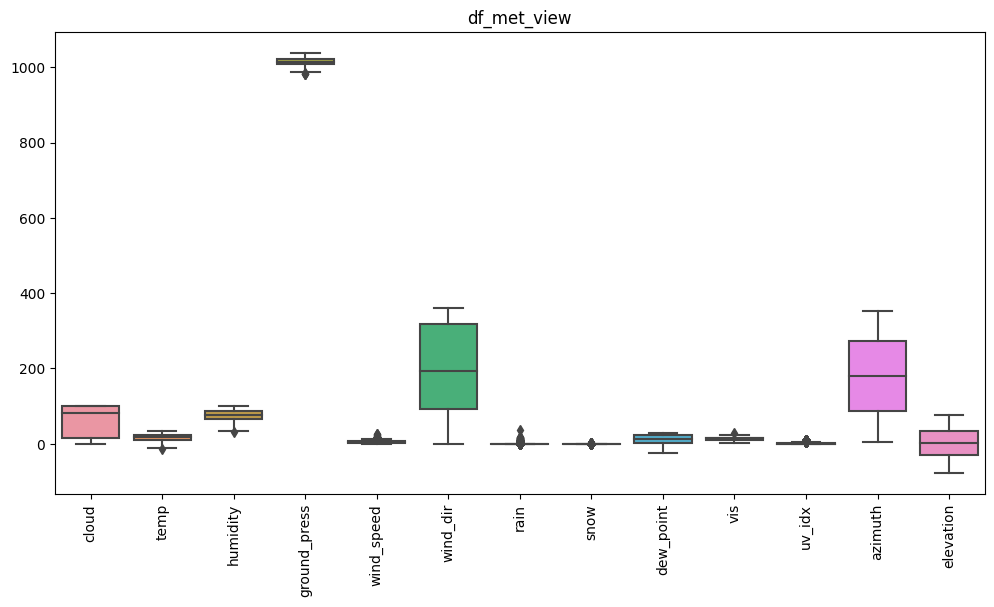

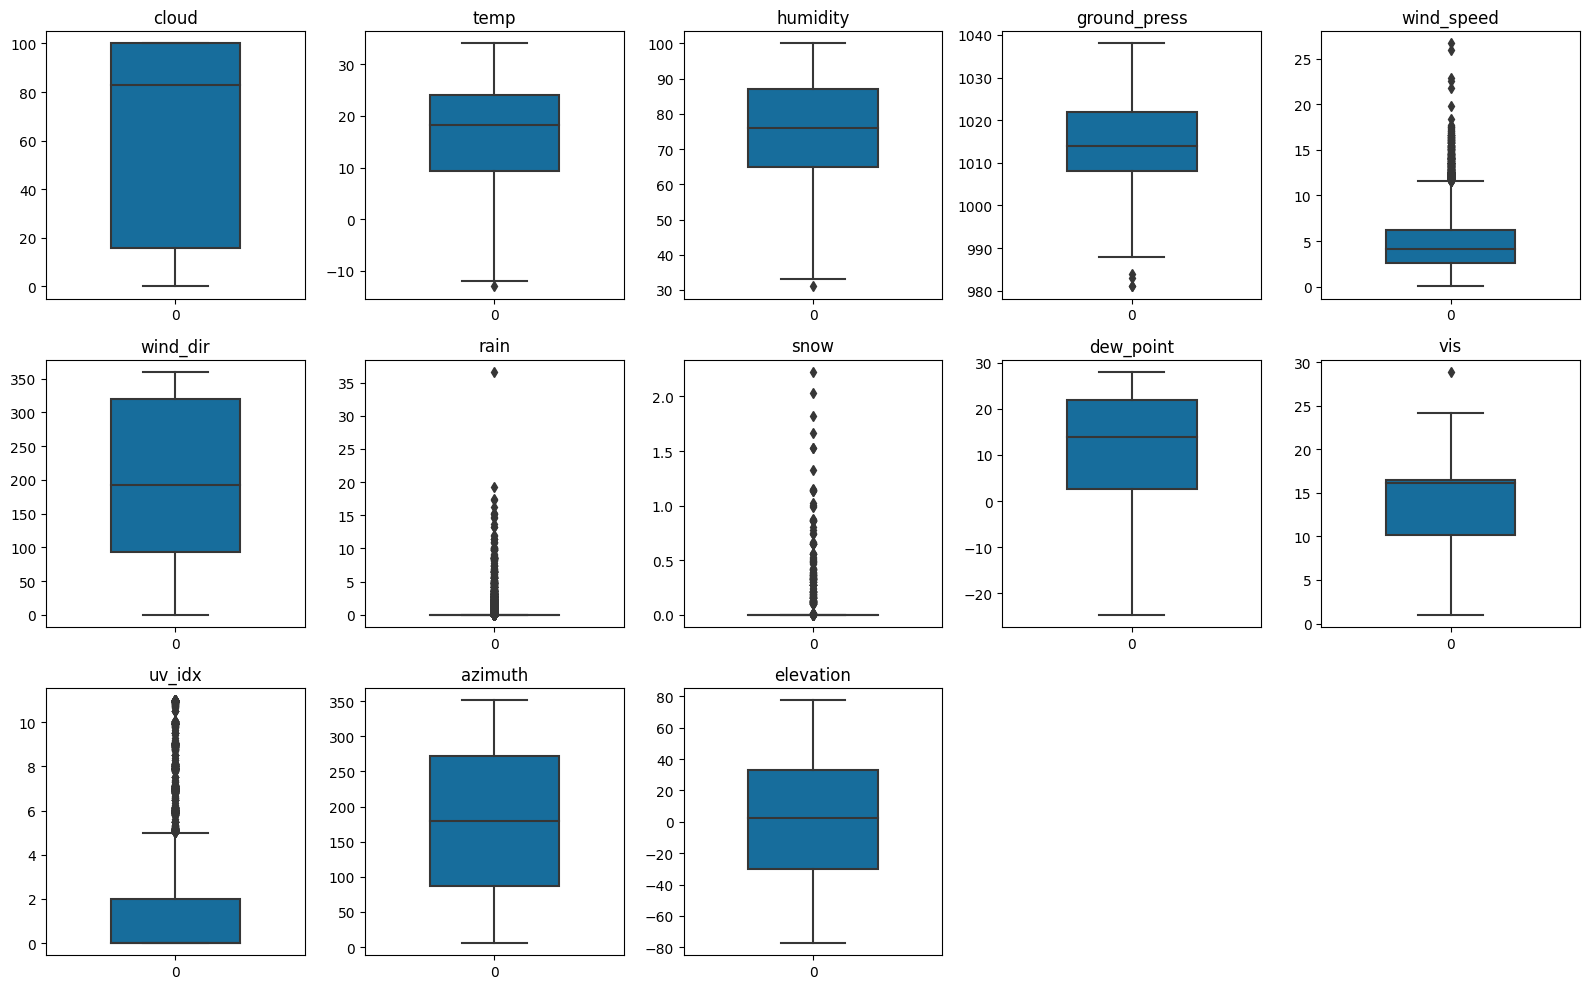

In [ ]:
# df_met_view boxplot

plt.figure(figsize=(12, 6))
plt.title('df_met_view')
plt.xticks(rotation=90)
sns.boxplot(df_met_view)

plt.figure(figsize=(16, 10))

for i, column in enumerate(df_met_view.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=df_met_view[column], orient="v", width=0.5, palette="colorblind")
    plt.title(column)

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

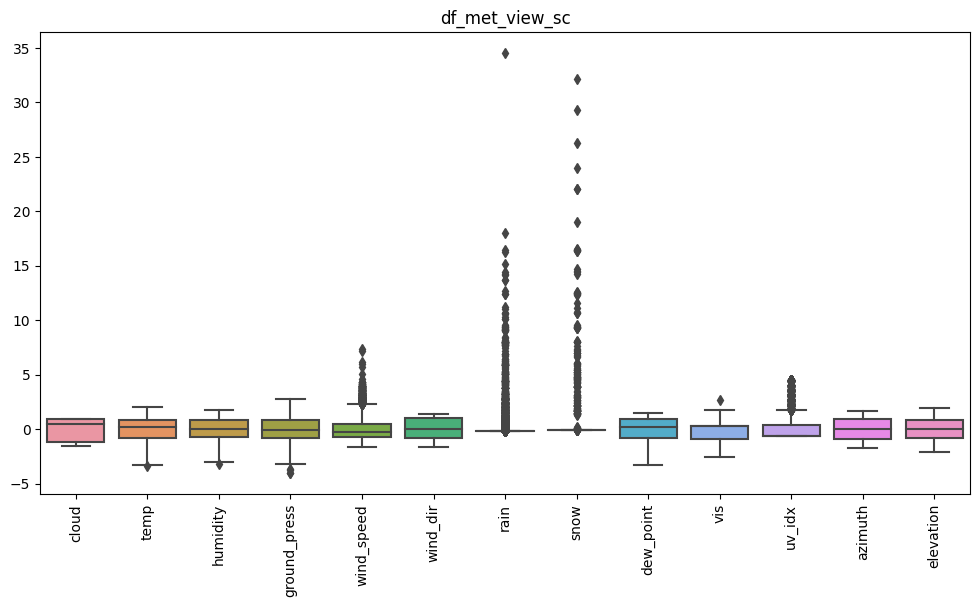

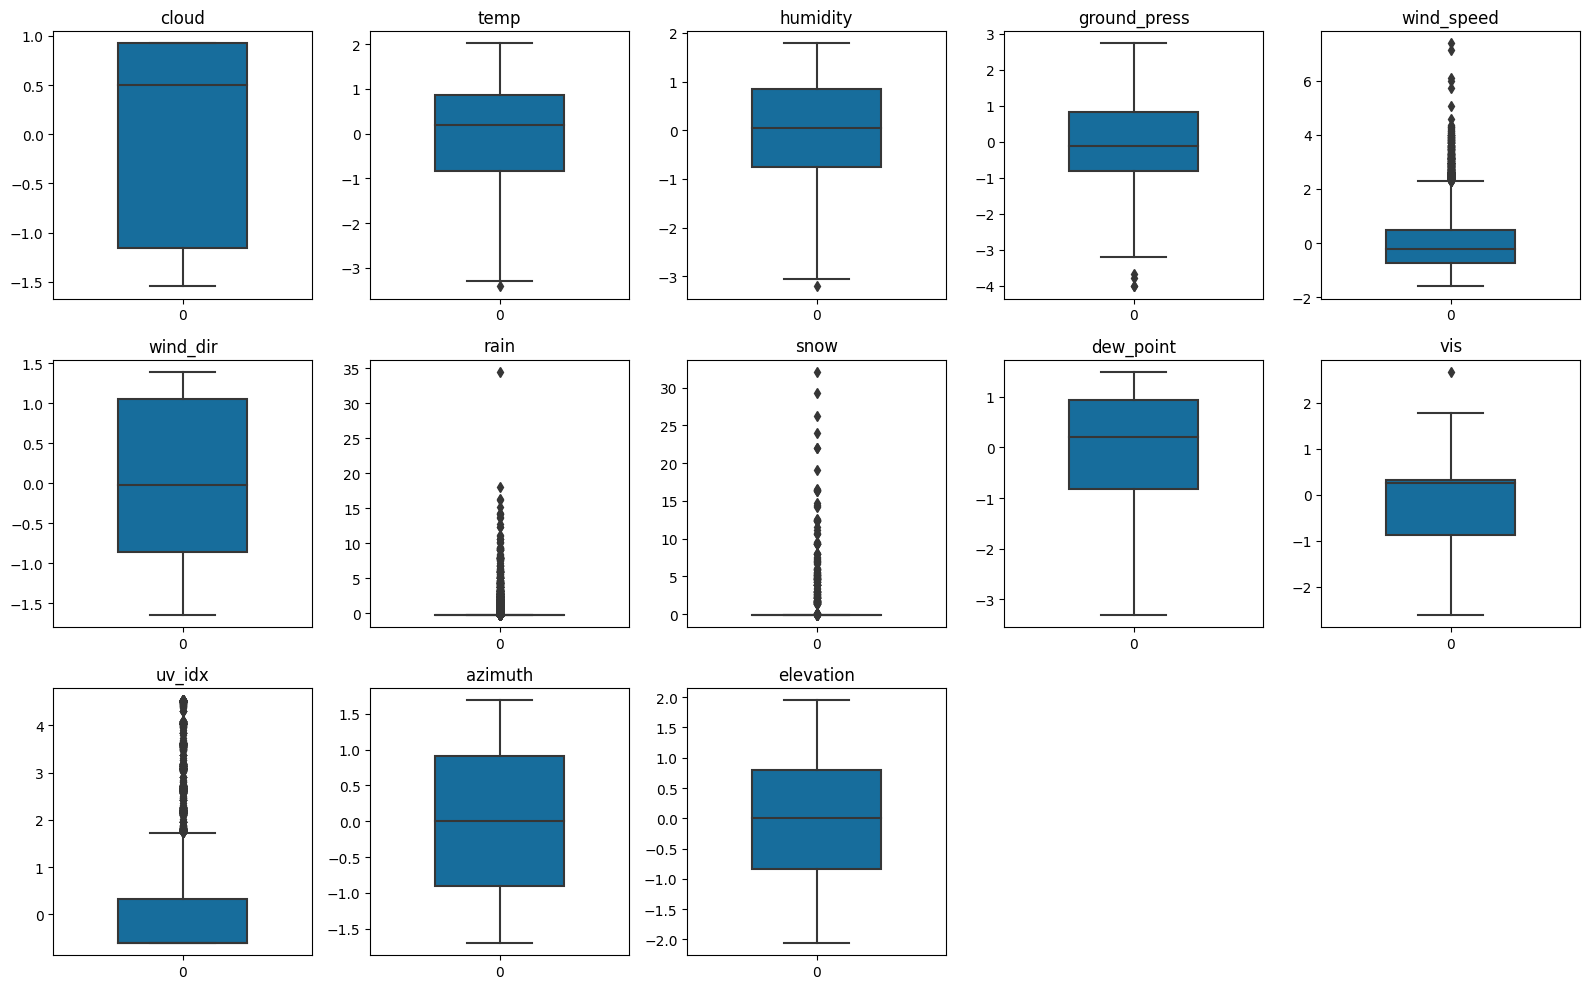

In [ ]:
# df_met_view_sc boxplot
scaler = StandardScaler()
scaler.fit(df_met_view)
df_met_view_sc = scaler.transform(df_met_view)
df_met_view_sc = pd.DataFrame(df_met_view_sc, columns=['cloud', 'temp', 'humidity', 'ground_press', 'wind_speed', 'wind_dir', 'rain', 'snow', 'dew_point', 'vis', 'uv_idx', 'azimuth', 'elevation'])

plt.figure(figsize=(12, 6))
plt.title('df_met_view_sc')
plt.xticks(rotation=90)
sns.boxplot(df_met_view_sc)

plt.figure(figsize=(16, 10))

for i, column in enumerate(df_met_view_sc.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=df_met_view_sc[column], orient="v", width=0.5, palette="colorblind")
    plt.title(column)

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()


In [ ]:
df_met

time       cloud       temp   humidity  \
0      2022-06-19 01:00:00+09:00    5.871524  23.030000  91.128476   
1      2022-06-19 02:00:00+09:00    5.000000  20.046829  92.000000   
2      2022-06-19 03:00:00+09:00   31.668514  20.275571  92.000000   
3      2022-06-19 04:00:00+09:00  100.000000  20.380388  93.000000   
4      2022-06-19 05:00:00+09:00  100.000000  22.030000  93.000000   
...                          ...         ...        ...        ...   
11611  2023-10-15 20:00:00+09:00    0.000000  18.807459  70.000000   
11612  2023-10-15 21:00:00+09:00    0.000000  17.918518  67.888518   
11613  2023-10-15 22:00:00+09:00    0.000000  17.030000  67.000000   
11614  2023-10-15 23:00:00+09:00    0.000000  18.730542  67.000000   
11615  2023-10-16 00:00:00+09:00    0.000000  14.030000  66.000000   

       ground_press  wind_speed    wind_dir  rain  snow  dew_point        vis  \
0       1009.000000    2.394132  152.173538   0.0   0.0  20.193333  19.193333   
1       1009.000000    2.490000  133.000000   0.0   0.0  20.010169  16.100000   
2       1008.012749    2.340765  139.974501   0.0   0.0  20.304918  16.257377   
3       1008.000000    2.770000  142.000000   0.0   0.0  20.403077  19.004615   
4       1008.000000    2.557647  133.882353   0.0   0.0  20.495385  10.143077   
...             ...         ...         ...   ...   ...        ...        ...   
11611   1014.000000    6.320000  307.000000   0.0   0.0  13.204762  16.100000   
11612   1015.000000    5.553144  306.554073   0.0   0.0  13.300000  16.100000   
11613   1015.000000    5.100000  303.000000   0.0   0.0  13.055738  20.349180   
11614   1015.000000    5.190000  297.000000   0.0   0.0  12.183333   9.590000   
11615   1015.000000    5.360000  293.000000   0.0   0.0  11.700000   6.400000   

       uv_idx     azimuth  elevation  
0         0.0    6.704280 -31.529640  
1         0.0   22.196370 -28.440428  
2         0.0   35.919394 -22.437437  
3         0.0   47.557714 -14.221450  
4         0.0   57.378183  -4.444699  
...       ...         ...        ...  
11611     0.0  277.464745 -25.379191  
11612     0.0  287.678638 -37.409688  
11613     0.0  301.007172 -48.655175  
11614     0.0  320.433966 -58.056463  
11615     0.0  349.065111 -63.421759  

[11616 rows x 14 columns]

# df_pred 시각화

In [ ]:
df_pred_view = df_pred.copy()
df_pred_view['time'] = df_pred_view['time'].str[:-6]
df_pred_view['time'] = pd.to_datetime(df_pred_view['time'], format='%Y-%m-%d %H:%M:%S')
df_pred_view.set_index('time', inplace=True)

In [ ]:
df_pred_view_R1 = pd.DataFrame()
df_pred_view_R2 = pd.DataFrame()

for model_id in [0, 1, 2, 3, 4]:
    filtered_rows = df_pred_view[(df_pred_view['round'] == 1) & (df_pred_view['model_id'] == model_id)]
    new_column_name = f'R1_md{model_id}'
    df_pred_view_R1[new_column_name] = filtered_rows['amount'].values

for model_id in [0, 1, 2, 3, 4]:
    filtered_rows = df_pred_view[(df_pred_view['round'] == 2) & (df_pred_view['model_id'] == model_id)]
    new_column_name = f'R2_md{model_id}'
    df_pred_view_R2[new_column_name] = filtered_rows['amount'].values

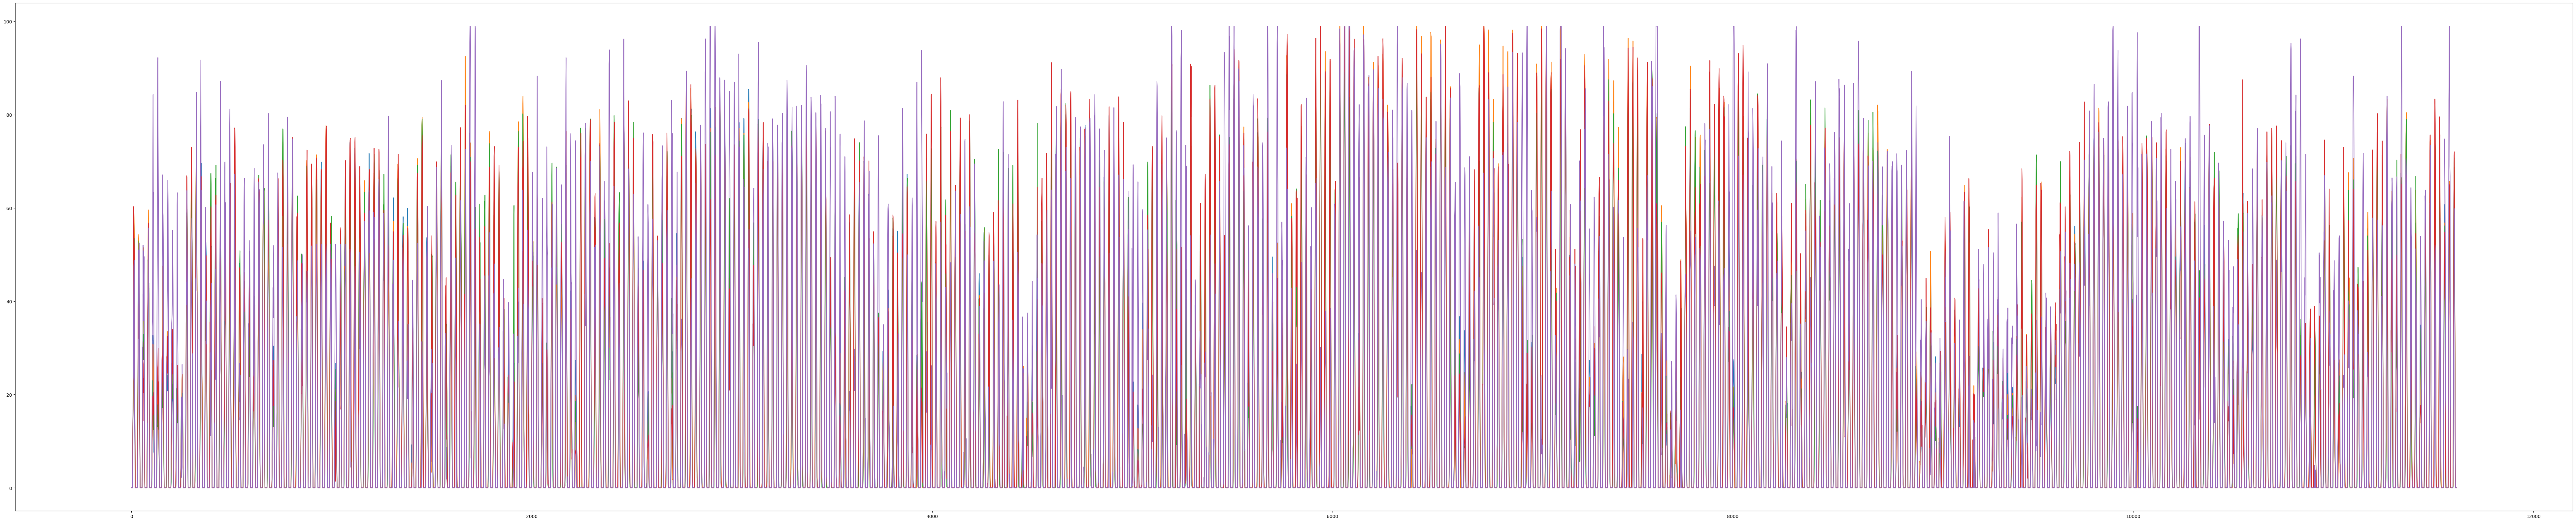

In [ ]:
plt.figure(figsize=(100, 20))
plt.plot(df_pred_view_R1)

# df_elc data check

In [ ]:
df_elc_check = df_elc.copy()

df_elc_check['time'] = df_elc['time'].str[:-6]
df_elc_check['time'] = pd.to_datetime(df_elc_check['time'], format='%Y-%m-%d %H:%M:%S')
df_elc_check['time'] = df_elc_check['time'] - datetime.timedelta(hours=1)
df_elc_check.set_index('time', inplace=True)
df_elc_check['daily_sum'] = df_elc_check.amount.resample('D').sum()
zero_sum_indices = df_elc_check[df_elc_check['daily_sum'] == 0].index
print(zero_sum_indices)

DatetimeIndex([], dtype='datetime64[ns]', name='time', freq=None)


In [ ]:
df_elc_view = df_elc.copy()


# df_pred 전처리

In [ ]:
# df_pred에 누락된 time 찾기
df_pred['time'] = df_pred['time'].str[:-6]
df_pred['time'] = pd.to_datetime(df_pred['time'], format='%Y-%m-%d %H:%M:%S')
time_counts = df_pred['time'].value_counts()
single_data_times = time_counts[time_counts == 5].index
print(single_data_times)

DatetimeIndex(['2023-08-17 23:00:00', '2023-08-17 21:00:00',
               '2023-08-17 22:00:00', '2023-08-17 04:00:00',
               '2023-08-18 00:00:00', '2023-08-17 02:00:00',
               '2023-08-17 20:00:00', '2023-08-17 19:00:00',
               '2023-08-17 18:00:00', '2023-08-17 17:00:00',
               '2023-08-17 16:00:00', '2023-08-17 15:00:00',
               '2023-08-17 14:00:00', '2023-08-17 13:00:00',
               '2023-08-17 12:00:00', '2023-08-17 11:00:00',
               '2023-08-17 10:00:00', '2023-08-17 09:00:00',
               '2023-08-17 08:00:00', '2023-08-17 07:00:00',
               '2023-08-17 06:00:00', '2023-08-17 05:00:00',
               '2023-08-17 01:00:00', '2023-08-17 03:00:00'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
# round2에 누락된 데이터를 round1 값으로 대체
aug_17_data_round1 = df_pred[(df_pred['round'] == 1) & (df_pred['time'].dt.date == pd.to_datetime('2022-08-17').date())]
aug_17_data_round1['round'] = 2
df_pred = pd.concat([df_pred, aug_17_data_round1], ignore_index=True)

# round를 시간순으로 정렬
round2_data = df_pred[df_pred['round'] == 2]
round2_data = round2_data.sort_values(by='time')
round1_data = df_pred[df_pred['round'] == 1]
round1_data = round1_data.sort_values(by='time')
df_pred = pd.concat([round1_data, round2_data], ignore_index=True)

<ipython-input-16-348cded65c2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_17_data_round1['round'] = 2


In [ ]:
# 모든 라운드와 모델에 대해 루프 실행하여 열을 추가
df_pred2 = pd.DataFrame()

for round_num in [1, 2]:
    for model_id in [0, 1, 2, 3, 4]:
        filtered_rows = df_pred[(df_pred['round'] == round_num) & (df_pred['model_id'] == model_id)]
        new_column_name = f'R{round_num}_md{model_id}'

        df_pred2[new_column_name] = filtered_rows['amount'].values

# df_met에 hour, Q12, Q13, Q_mean 추가하기

In [ ]:
df_met['time'] = df_met['time'].str[:-6]
df_met['time'] = pd.to_datetime(df_met['time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
an = [1.000110,0.034221,0.000719]
bn = [0,0.001280,0.000077]
cn = [0.006918,-0.399912,-0.006758,-0.002697]
dn = [0,0.070257,0.000907,0.000148]


S = 1367 #solar constant
L = 36.9 #latitude
L_rad = np.deg2rad(L) #latitude를 rad으로 변환

d = df_met['time'].dt.dayofyear
t = 2*np.pi*d/365

In [ ]:
LN = datetime.datetime(2023, 11, 7, 12, 0, 0) # local noon time

In [ ]:
#sun-earth distance  : r0 값을 알 수 없어서, a로 근사한 식을 이용함
r0_r2 = np.zeros(t.shape)
for i in range(0,3) :
    r0_r2 = r0_r2+an[i]*np.cos(i*t)+bn[i]*np.sin(i*t)

#declination angle
delta_rad = np.zeros(t.shape)
for i in range(0,4) :
    delta_rad = delta_rad+cn[i]*np.cos(i*t)+dn[i]*np.sin(i*t)

In [ ]:
#Solar insolation for hour gap
Q = np.zeros(t.shape)
gap = np.pi/12
df_met['hour'] = df_met['time'].dt.hour
df_met['Q12'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((df_met.hour-12)*gap)))
df_met['Q12'] = df_met['Q12'].apply(lambda x: max(0, x))
df_met['Q13'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((df_met.hour-13)*gap)))
df_met['Q13'] = df_met['Q13'].apply(lambda x: max(0, x))
df_met['Q_mean'] = (df_met['Q12']+df_met['Q13'])/2

In [ ]:
df_met

time       cloud       temp   humidity  ground_press  \
0     2022-06-19 01:00:00    5.871524  23.030000  91.128476   1009.000000   
1     2022-06-19 02:00:00    5.000000  20.046829  92.000000   1009.000000   
2     2022-06-19 03:00:00   31.668514  20.275571  92.000000   1008.012749   
3     2022-06-19 04:00:00  100.000000  20.380388  93.000000   1008.000000   
4     2022-06-19 05:00:00  100.000000  22.030000  93.000000   1008.000000   
...                   ...         ...        ...        ...           ...   
11611 2023-10-15 20:00:00    0.000000  18.807459  70.000000   1014.000000   
11612 2023-10-15 21:00:00    0.000000  17.918518  67.888518   1015.000000   
11613 2023-10-15 22:00:00    0.000000  17.030000  67.000000   1015.000000   
11614 2023-10-15 23:00:00    0.000000  18.730542  67.000000   1015.000000   
11615 2023-10-16 00:00:00    0.000000  14.030000  66.000000   1015.000000   

       wind_speed    wind_dir  rain  snow  dew_point        vis  uv_idx  \
0        2.394132  152.173538   0.0   0.0  20.193333  19.193333     0.0   
1        2.490000  133.000000   0.0   0.0  20.010169  16.100000     0.0   
2        2.340765  139.974501   0.0   0.0  20.304918  16.257377     0.0   
3        2.770000  142.000000   0.0   0.0  20.403077  19.004615     0.0   
4        2.557647  133.882353   0.0   0.0  20.495385  10.143077     0.0   
...           ...         ...   ...   ...        ...        ...     ...   
11611    6.320000  307.000000   0.0   0.0  13.204762  16.100000     0.0   
11612    5.553144  306.554073   0.0   0.0  13.300000  16.100000     0.0   
11613    5.100000  303.000000   0.0   0.0  13.055738  20.349180     0.0   
11614    5.190000  297.000000   0.0   0.0  12.183333   9.590000     0.0   
11615    5.360000  293.000000   0.0   0.0  11.700000   6.400000     0.0   

          azimuth  elevation  hour        Q12  Q13     Q_mean  
0        6.704280 -31.529640     1   0.000000  0.0   0.000000  
1       22.196370 -28.440428     2   0.000000  0.0   0.000000  
2       35.919394 -22.437437     3   0.000000  0.0   0.000000  
3       47.557714 -14.221450     4   0.000000  0.0   0.000000  
4       57.378183  -4.444699     5  64.809707  0.0  32.404854  
...           ...        ...   ...        ...  ...        ...  
11611  277.464745 -25.379191    20   0.000000  0.0   0.000000  
11612  287.678638 -37.409688    21   0.000000  0.0   0.000000  
11613  301.007172 -48.655175    22   0.000000  0.0   0.000000  
11614  320.433966 -58.056463    23   0.000000  0.0   0.000000  
11615  349.065111 -63.421759     0   0.000000  0.0   0.000000  

[11616 rows x 18 columns]

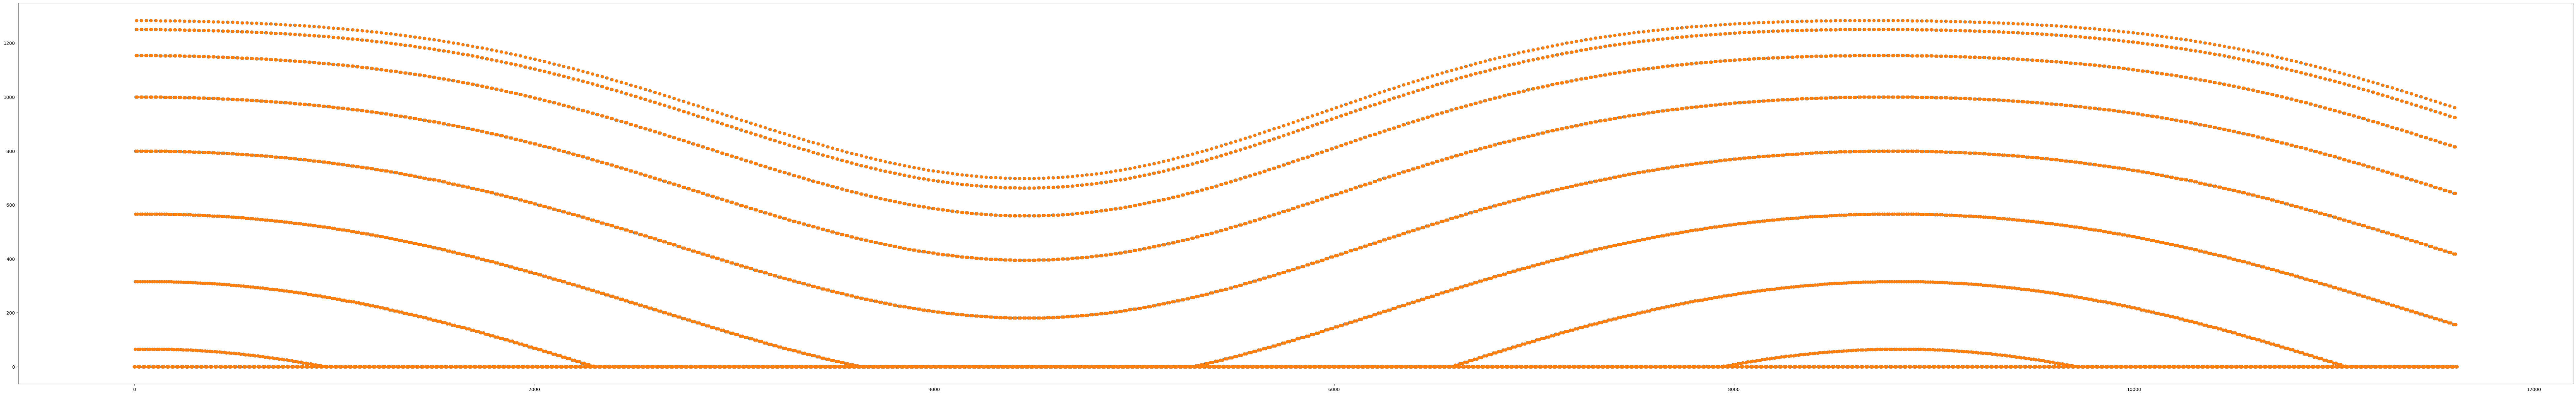

In [ ]:
# Create a scatter plot
plt.figure(figsize=(100, 15))
plt.scatter(df_met.index, df_met['Q12'])
plt.scatter(df_met.index, df_met['Q13'])


# df_met과 df_pred, df_elc 데이터 합치기

In [ ]:
df_x = pd.concat([df_met, df_pred2], axis=1)

In [ ]:
df_x

time       cloud       temp   humidity  ground_press  \
0     2022-06-19 01:00:00    5.871524  23.030000  91.128476   1009.000000   
1     2022-06-19 02:00:00    5.000000  20.046829  92.000000   1009.000000   
2     2022-06-19 03:00:00   31.668514  20.275571  92.000000   1008.012749   
3     2022-06-19 04:00:00  100.000000  20.380388  93.000000   1008.000000   
4     2022-06-19 05:00:00  100.000000  22.030000  93.000000   1008.000000   
...                   ...         ...        ...        ...           ...   
11611 2023-10-15 20:00:00    0.000000  18.807459  70.000000   1014.000000   
11612 2023-10-15 21:00:00    0.000000  17.918518  67.888518   1015.000000   
11613 2023-10-15 22:00:00    0.000000  17.030000  67.000000   1015.000000   
11614 2023-10-15 23:00:00    0.000000  18.730542  67.000000   1015.000000   
11615 2023-10-16 00:00:00    0.000000  14.030000  66.000000   1015.000000   

       wind_speed    wind_dir  rain  snow  dew_point  ...  R1_md0  R1_md1  \
0        2.394132  152.173538   0.0   0.0  20.193333  ...     0.0     0.0   
1        2.490000  133.000000   0.0   0.0  20.010169  ...     0.0     0.0   
2        2.340765  139.974501   0.0   0.0  20.304918  ...     0.0     0.0   
3        2.770000  142.000000   0.0   0.0  20.403077  ...     0.0     0.0   
4        2.557647  133.882353   0.0   0.0  20.495385  ...     0.0     0.0   
...           ...         ...   ...   ...        ...  ...     ...     ...   
11611    6.320000  307.000000   0.0   0.0  13.204762  ...     0.0     0.0   
11612    5.553144  306.554073   0.0   0.0  13.300000  ...     0.0     0.0   
11613    5.100000  303.000000   0.0   0.0  13.055738  ...     0.0     0.0   
11614    5.190000  297.000000   0.0   0.0  12.183333  ...     0.0     0.0   
11615    5.360000  293.000000   0.0   0.0  11.700000  ...     0.0     0.0   

       R1_md2  R1_md3  R1_md4  R2_md0  R2_md1  R2_md2  R2_md3  R2_md4  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...     ...     ...     ...     ...  
11611     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11612     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11613     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11614     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11615     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[11616 rows x 28 columns]

In [ ]:
x = df_x.drop('time', axis=1)
y = df_elc['amount']

In [ ]:
df = pd.concat([df_x, df_elc['amount']], axis=1).drop('time', axis=1)

In [ ]:
df

cloud       temp   humidity  ground_press  wind_speed    wind_dir  \
0        5.871524  23.030000  91.128476   1009.000000    2.394132  152.173538   
1        5.000000  20.046829  92.000000   1009.000000    2.490000  133.000000   
2       31.668514  20.275571  92.000000   1008.012749    2.340765  139.974501   
3      100.000000  20.380388  93.000000   1008.000000    2.770000  142.000000   
4      100.000000  22.030000  93.000000   1008.000000    2.557647  133.882353   
...           ...        ...        ...           ...         ...         ...   
11611    0.000000  18.807459  70.000000   1014.000000    6.320000  307.000000   
11612    0.000000  17.918518  67.888518   1015.000000    5.553144  306.554073   
11613    0.000000  17.030000  67.000000   1015.000000    5.100000  303.000000   
11614    0.000000  18.730542  67.000000   1015.000000    5.190000  297.000000   
11615    0.000000  14.030000  66.000000   1015.000000    5.360000  293.000000   

       rain  snow  dew_point        vis  ...  R1_md1  R1_md2  R1_md3  R1_md4  \
0       0.0   0.0  20.193333  19.193333  ...     0.0     0.0     0.0     0.0   
1       0.0   0.0  20.010169  16.100000  ...     0.0     0.0     0.0     0.0   
2       0.0   0.0  20.304918  16.257377  ...     0.0     0.0     0.0     0.0   
3       0.0   0.0  20.403077  19.004615  ...     0.0     0.0     0.0     0.0   
4       0.0   0.0  20.495385  10.143077  ...     0.0     0.0     0.0     0.0   
...     ...   ...        ...        ...  ...     ...     ...     ...     ...   
11611   0.0   0.0  13.204762  16.100000  ...     0.0     0.0     0.0     0.0   
11612   0.0   0.0  13.300000  16.100000  ...     0.0     0.0     0.0     0.0   
11613   0.0   0.0  13.055738  20.349180  ...     0.0     0.0     0.0     0.0   
11614   0.0   0.0  12.183333   9.590000  ...     0.0     0.0     0.0     0.0   
11615   0.0   0.0  11.700000   6.400000  ...     0.0     0.0     0.0     0.0   

       R2_md0  R2_md1  R2_md2  R2_md3  R2_md4  amount  
0         0.0     0.0     0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...     ...     ...  
11611     0.0     0.0     0.0     0.0     0.0     0.0  
11612     0.0     0.0     0.0     0.0     0.0     0.0  
11613     0.0     0.0     0.0     0.0     0.0     0.0  
11614     0.0     0.0     0.0     0.0     0.0     0.0  
11615     0.0     0.0     0.0     0.0     0.0     0.0  

[11616 rows x 28 columns]

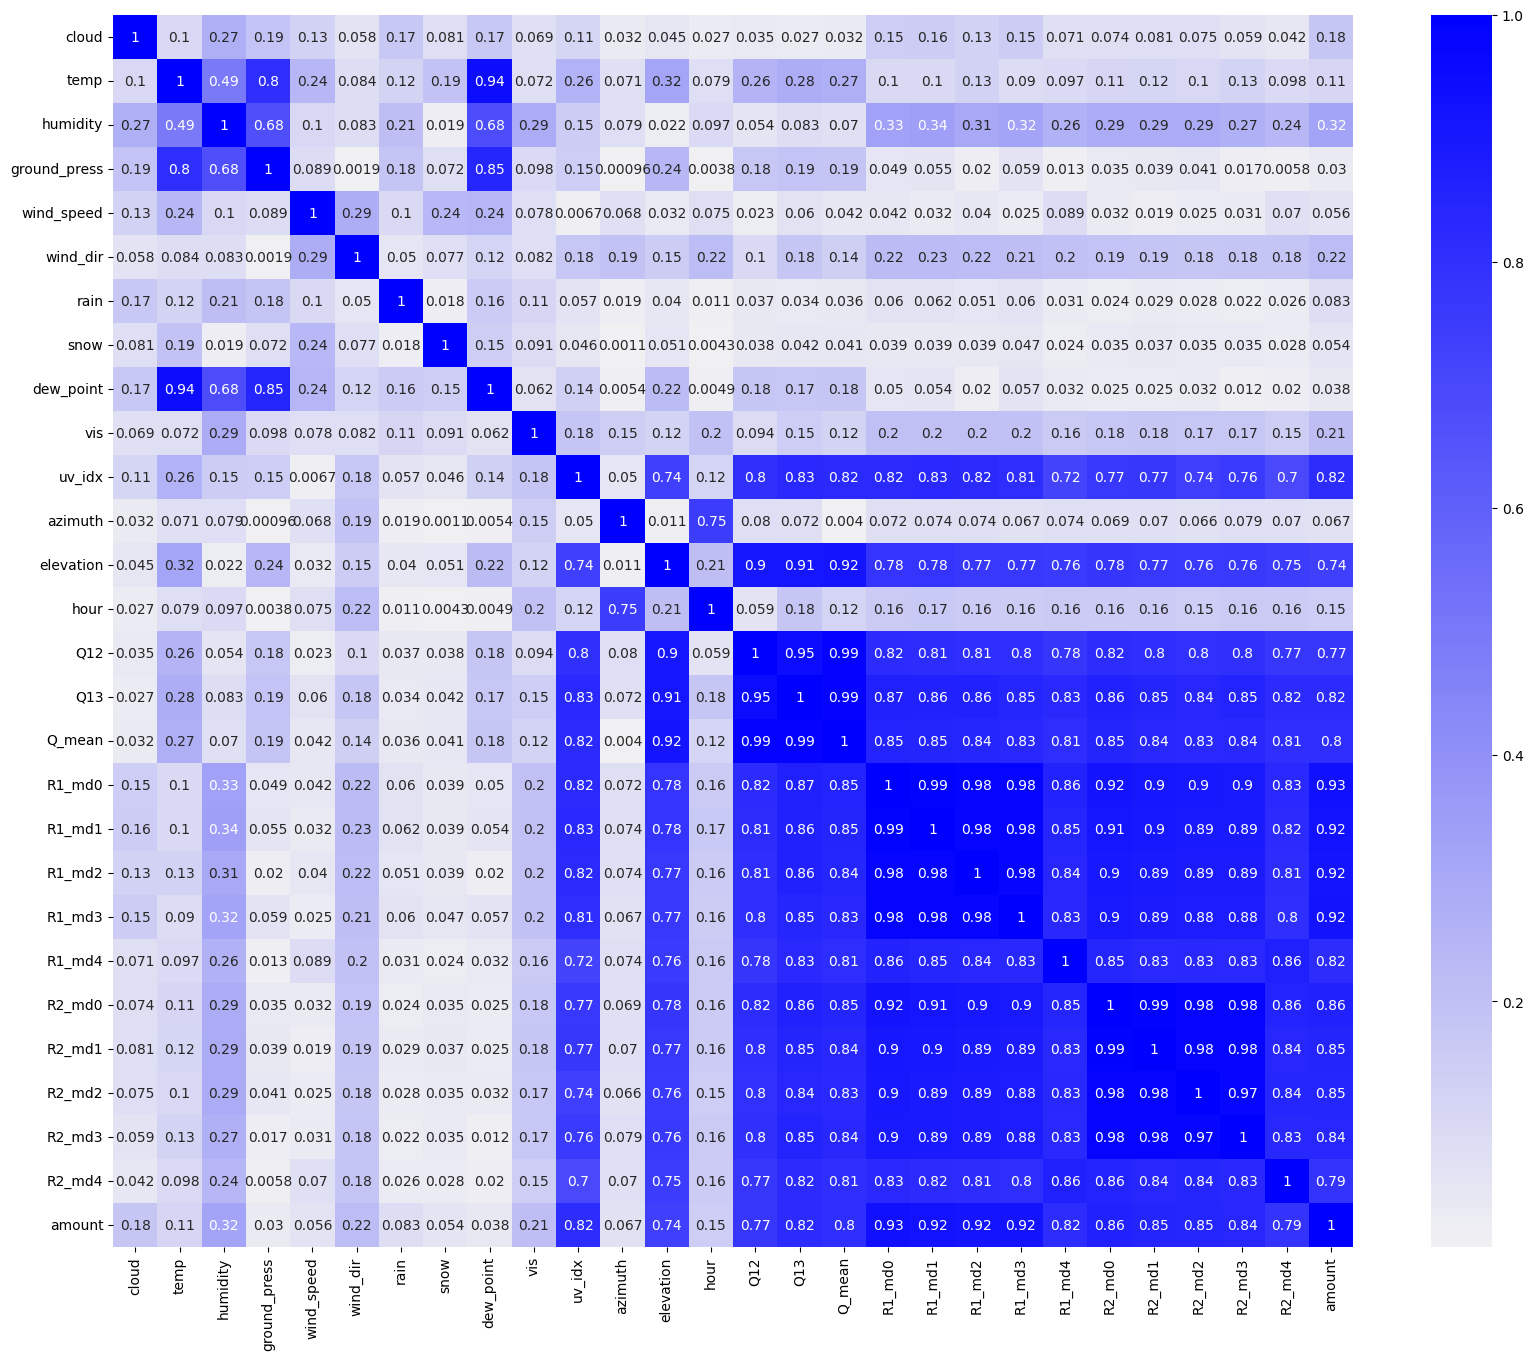

In [ ]:
plt.figure(figsize=(20, 16))
cmap = sns.light_palette(color="b", as_cmap=True)
sns.heatmap(df.corr().abs(), annot=True, cmap=cmap)
plt.show()

In [ ]:
# 과적합 고려해 y와 상관성이 낮은 변수들, x변수들끼리 상관계수 높은것들 제거

df = df.drop(columns=['temp', 'ground_press', 'wind_speed', 'wind_dir', 'rain', 'snow', 'dew_point', 'azimuth', 'elevation', 'hour', 'Q12', 'Q_mean'])

In [ ]:
df

cloud   humidity        vis  uv_idx  Q13  R1_md0  R1_md1  R1_md2  \
0        5.871524  91.128476  19.193333     0.0  0.0     0.0     0.0     0.0   
1        5.000000  92.000000  16.100000     0.0  0.0     0.0     0.0     0.0   
2       31.668514  92.000000  16.257377     0.0  0.0     0.0     0.0     0.0   
3      100.000000  93.000000  19.004615     0.0  0.0     0.0     0.0     0.0   
4      100.000000  93.000000  10.143077     0.0  0.0     0.0     0.0     0.0   
...           ...        ...        ...     ...  ...     ...     ...     ...   
11611    0.000000  70.000000  16.100000     0.0  0.0     0.0     0.0     0.0   
11612    0.000000  67.888518  16.100000     0.0  0.0     0.0     0.0     0.0   
11613    0.000000  67.000000  20.349180     0.0  0.0     0.0     0.0     0.0   
11614    0.000000  67.000000   9.590000     0.0  0.0     0.0     0.0     0.0   
11615    0.000000  66.000000   6.400000     0.0  0.0     0.0     0.0     0.0   

       R1_md3  R1_md4  R2_md0  R2_md1  R2_md2  R2_md3  R2_md4  amount  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...     ...     ...     ...     ...  
11611     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11612     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11613     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11614     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
11615     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[11616 rows x 16 columns]

In [35]:
df.to_csv('data.csv', index=False)